In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df2=pd.read_csv('/content/drive/MyDrive/DataSet/bensin2.csv')
df2

,Liter,Penumpang,Bagasi,Kecepatan,RPM,Suhu,Kilometer
0,20,1,0,42,3000,29,142
1,25,2,15,50,4000,36,177
2,20,4,10,50,3000,24,144
3,30,5,25,50,3000,18,203
4,40,1,40,50,3200,30,273
...,...,...,...,...,...,...,...
60,31,3,0,50,3000,30,203
61,37,1,0,50,3000,22,241
62,23,2,10,50,3000,30,142
63,36,2,0,50,3000,20,241


Korelasi Antar-data

In [4]:
df2.corr(method = 'pearson')

,Liter,Penumpang,Bagasi,Kecepatan,Suhu,Kilometer
Liter,1.000000,-0.087997,0.097560,0.109370,0.079470,0.700815
Penumpang,-0.087997,1.000000,0.081542,0.111942,-0.039954,-0.034175
Bagasi,0.097560,0.081542,1.000000,0.082096,-0.049363,-0.023318
Kecepatan,0.109370,0.111942,0.082096,1.000000,-0.009752,0.042819
Suhu,0.079470,-0.039954,-0.049363,-0.009752,1.000000,0.136657
Kilometer,0.700815,-0.034175,-0.023318,0.042819,0.136657,1.000000


**pemodelan**

In [5]:
import numpy as np
import sklearn.model_selection as ms
X=df2[['Liter', 'Suhu']]
y=df2[['Kilometer']]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state = 0)

import sklearn.linear_model as lm
model1 = lm.LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [6]:
print('intercept=', model1.intercept_)

intercept= [-107.00860324]


In [7]:
print('slope=', model1.coef_)

slope= [[6.40716659 3.50902985]]


**Simple Linear Regression**

In [9]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/DataSet/bensin2.csv')
df1

,Liter,Penumpang,Bagasi,Kecepatan,RPM,Suhu,Kilometer
0,20,1,0,42,3000,29,142
1,25,2,15,50,4000,36,177
2,20,4,10,50,3000,24,144
3,30,5,25,50,3000,18,203
4,40,1,40,50,3200,30,273
...,...,...,...,...,...,...,...
60,31,3,0,50,3000,30,203
61,37,1,0,50,3000,22,241
62,23,2,10,50,3000,30,142
63,36,2,0,50,3000,20,241


In [10]:
df1.describe()

,Liter,Penumpang,Bagasi,Kecepatan,Suhu,Kilometer
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,26.446154,2.384615,8.538462,49.876923,28.738462,165.307692
std,7.424686,1.558167,13.101857,0.992278,3.378595,68.571113
min,6.000000,1.000000,0.000000,42.000000,18.000000,1.000000
25%,23.000000,1.000000,0.000000,50.000000,29.000000,142.000000
50%,25.000000,2.000000,0.000000,50.000000,30.000000,174.000000
75%,30.000000,4.000000,15.000000,50.000000,30.000000,211.000000
max,45.000000,6.000000,60.000000,50.000000,36.000000,278.000000


Memisahkan training data dan testing data

In [11]:

import numpy as np
import sklearn.model_selection as ms
liter = df1[['Liter']]
kilometer =df1[['Kilometer']]
X_train, X_test, y_train, y_test = ms.train_test_split(liter, kilometer, test_size = 0.2, random_state = 0)
print(X_train.size, X_test.size)

52 13


visualisasi data

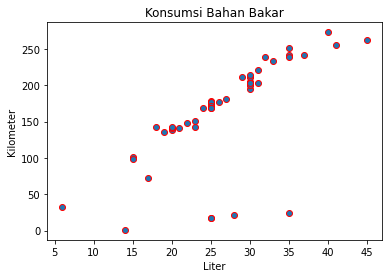

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, edgecolors ='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Konsumsi Bahan Bakar')
plt.show()
     

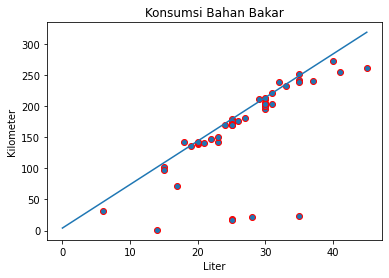

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, edgecolors = 'r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Konsumsi Bahan Bakar')
x1 = np.linspace(0, 45)
y1 = 4 + 7 * x1
plt.plot(x1, y1)
plt.show()

In [14]:
#Melatih Model
import sklearn.linear_model as lm
model1 = lm.LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [15]:
#nilai slope
model1.coef_

array([[6.49856462]])

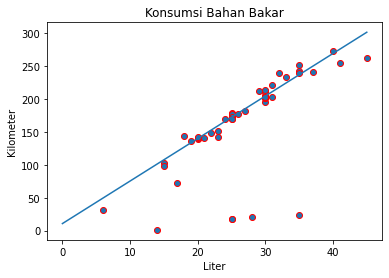

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, edgecolors = 'r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Konsumsi Bahan Bakar')
x1 = np.linspace(0 ,45)
y1 = 10.64 + 6.46 * x1
plt.plot(x1,y1)
plt.show()

R-squared menentukan seberapa dekat suatu data dengan garis lurus. R-squared = 1 - (RSS/TSS) RSS = Residual Sum of Squares (menjumlahkan kuadrat dari semua residual) TSS = Total Sum of Squares(menjumlahkan kuadrat dari selisih angka prediksi dengan angka rata2)

**Scoring Model**

In [17]:
#angka r2 mendekati 1, artinya model kita cukup bagus.
r2 = model1.score(X_test, y_test)
print(r2)

0.5552942776112435


In [18]:
jarak = model1.predict([[60]])
print(jarak)

[[382.90408631]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
prediksi = model1.predict(X_test)
print(prediksi)
print(y_test)

[[ 90.46867837]
 [155.45432458]
 [155.45432458]
 [142.45719533]
 [122.96150147]
 [252.93279389]
 [187.94714768]
 [220.43997079]
 [ 57.97585526]
 [226.93853541]
 [155.45432458]
 [122.96150147]
 [174.95001844]]
    Kilometer
45        102
29        167
43        177
62        142
34        144
33        278
31        211
40        241
26         65
63        241
22        166
2         144
11         18


In [20]:
import tensorflow as tf
tf.test.gpu_device_name()
     

''

In [21]:

!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

